In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [2]:
overview = pd.read_csv('data/1.1_primary_energy_overview.csv')
overview.head()

MSN  YYYYMM      Value  Column_Order                    Description  \
0  FFPRBUS  194913  28.740479             1  Total Fossil Fuels Production   
1  FFPRBUS  195013  32.553205             1  Total Fossil Fuels Production   
2  FFPRBUS  195113  35.782118             1  Total Fossil Fuels Production   
3  FFPRBUS  195213  34.964662             1  Total Fossil Fuels Production   
4  FFPRBUS  195313  35.338361             1  Total Fossil Fuels Production   

              Unit  
0  Quadrillion Btu  
1  Quadrillion Btu  
2  Quadrillion Btu  
3  Quadrillion Btu  
4  Quadrillion Btu

In [3]:
def pivot_on_YYYYMM(df: pd.DataFrame) -> (pd.DataFrame, pd.DataFrame):
    df['Date'] = pd.to_datetime(df['YYYYMM'].astype(str), format='%Y%m', errors='coerce')
    raw_df_monthly = df[df['Date'].notna()]
    df_monthly = raw_df_monthly.pivot_table(
        index='Date',
        columns='Description',
        values='Value',
    )
    
    raw_df_annually = df[df['Date'].isna()]
    raw_df_annually.loc[:,'Date'] = pd.to_datetime(raw_df_annually['YYYYMM'], format='%Y13').dt.year
    df_annually = raw_df_annually.pivot_table(
        index='Date',
        columns='Description',
        values='Value',
    )
    
    return df_monthly, df_annually

In [4]:
overview_monthly, overview_annually = pivot_on_YYYYMM(overview)
overview_monthly.head()

Description  Nuclear Electric Power Consumption  \
Date                                              
1973-01-01                             0.068103   
1973-02-01                             0.064634   
1973-03-01                             0.072494   
1973-04-01                             0.064070   
1973-05-01                             0.062111   

Description  Nuclear Electric Power Production  Primary Energy Exports  \
Date                                                                     
1973-01-01                            0.068103                0.125781   
1973-02-01                            0.064634                0.120883   
1973-03-01                            0.072494                0.139950   
1973-04-01                            0.064070                0.194185   
1973-05-01                            0.062111                0.196775   

Description  Primary Energy Imports  Primary Energy Net Imports  \
Date                                                              
1973-01-01                 1.173080                    1.047299   
1973-02-01                 1.168005                    1.047122   
1973-03-01                 1.309473                    1.169523   
1973-04-01                 1.085169                    0.890984   
1973-05-01                 1.162804                    0.966029   

Description  Primary Energy Stock Change and Other  \
Date                                                 
1973-01-01                                0.771858   
1973-02-01                                0.390129   
1973-03-01                               -0.067640   
1973-04-01                               -0.110067   
1973-05-01                               -0.305335   

Description  Total Fossil Fuels Consumption  Total Fossil Fuels Production  \
Date                                                                         
1973-01-01                         6.747651                       4.932632   
1973-02-01                         6.163095                       4.729582   
1973-03-01                         6.044647                       4.946902   
1973-04-01                         5.493184                       4.716271   
1973-05-01                         5.613551                       4.956995   

Description  Total Primary Energy Consumption  \
Date                                            
1973-01-01                           7.039731   
1973-02-01                           6.428796   
1973-03-01                           6.339964   
1973-04-01                           5.770589   
1973-05-01                           5.895781   

Description  Total Primary Energy Production  \
Date                                           
1973-01-01                          5.220574   
1973-02-01                          4.991545   
1973-03-01                          5.238082   
1973-04-01                          4.989672   
1973-05-01                          5.235087   

Description  Total Renewable Energy Consumption  \
Date                                              
1973-01-01                             0.219839   
1973-02-01                             0.197330   
1973-03-01                             0.218686   
1973-04-01                             0.209330   
1973-05-01                             0.215982   

Description  Total Renewable Energy Production  
Date                                            
1973-01-01                            0.219839  
1973-02-01                            0.197330  
1973-03-01                            0.218686  
1973-04-01                            0.209330  
1973-05-01                            0.215982

In [5]:
fig = px.line(overview_monthly.reset_index(), 
              x='Date', y=['Total Primary Energy Production', 'Total Primary Energy Consumption', 'Primary Energy Exports', 'Primary Energy Imports'],
              title='Monthly Energy Production/Consumption in Quadrillion Btu')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [6]:
px.line(overview_annually.reset_index(), 
        x='Date', y=['Total Primary Energy Production', 'Total Primary Energy Consumption', 'Primary Energy Exports', 'Primary Energy Imports'],
        title='Annual Energy Production/Consumption in Quadrillion Btu')

In [7]:
overview_monthly.columns

Index(['Nuclear Electric Power Consumption',
       'Nuclear Electric Power Production', 'Primary Energy Exports',
       'Primary Energy Imports', 'Primary Energy Net Imports',
       'Primary Energy Stock Change and Other',
       'Total Fossil Fuels Consumption', 'Total Fossil Fuels Production',
       'Total Primary Energy Consumption', 'Total Primary Energy Production',
       'Total Renewable Energy Consumption',
       'Total Renewable Energy Production'],
      dtype='object', name='Description')

In [8]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=overview_monthly.index, y=overview_monthly['Nuclear Electric Power Production'], mode='lines', name='Nuclear', stackgroup='one'))
fig.add_trace(go.Scatter(x=overview_monthly.index, y=overview_monthly['Total Renewable Energy Production'], mode='lines', name='Renewable', stackgroup='one'))
fig.add_trace(go.Scatter(x=overview_monthly.index, y=overview_monthly['Total Fossil Fuels Production'], mode='lines', name='Fossil Fuels', stackgroup='one'))

fig.update_layout(title='Combined Energy Source Contributions Over Time', xaxis_title='Date', yaxis_title='Quadrillion BTU')
fig.show()

In [9]:
source_production = pd.read_csv('data/1.2_primary_energy_production_by_source.csv')
source_production['Value'] = source_production['Value'].apply(lambda x: np.nan if x == "Not Available" else x).astype(float)
source_production

MSN  YYYYMM       Value  Column_Order  \
0     CLPRBUS  194913   11.973882             1   
1     CLPRBUS  195013   14.060135             1   
2     CLPRBUS  195113   14.419325             1   
3     CLPRBUS  195213   12.734313             1   
4     CLPRBUS  195313   12.277746             1   
...       ...     ...         ...           ...   
8978  TEPRBUS  202313  102.759666            13   
8979  TEPRBUS  202401    8.514830            13   
8980  TEPRBUS  202402    8.303869            13   
8981  TEPRBUS  202403    8.666857            13   
8982  TEPRBUS  202404    8.189693            13   

                          Description             Unit  
0                     Coal Production  Quadrillion Btu  
1                     Coal Production  Quadrillion Btu  
2                     Coal Production  Quadrillion Btu  
3                     Coal Production  Quadrillion Btu  
4                     Coal Production  Quadrillion Btu  
...                               ...              ...  
8978  Total Primary Energy Production  Quadrillion Btu  
8979  Total Primary Energy Production  Quadrillion Btu  
8980  Total Primary Energy Production  Quadrillion Btu  
8981  Total Primary Energy Production  Quadrillion Btu  
8982  Total Primary Energy Production  Quadrillion Btu  

[8983 rows x 6 columns]

In [10]:
source_production_monthly, source_production_annually = pivot_on_YYYYMM(source_production)
source_production_monthly

Description  Biomass Energy Production  Coal Production  Crude Oil Production  \
Date                                                                            
1973-01-01                    0.129787         1.166486              1.649833   
1973-02-01                    0.117338         1.086072              1.525783   
1973-03-01                    0.129938         1.196571              1.667094   
1973-04-01                    0.125636         1.112230              1.616791   
1973-05-01                    0.129834         1.216978              1.665377   
...                                ...              ...                   ...   
2023-12-01                    0.460841         0.932554              2.339242   
2024-01-01                    0.428376         0.898812              2.213865   
2024-02-01                    0.415684         0.896746              2.161599   
2024-03-01                    0.443182         0.852799              2.323676   
2024-04-01                    0.415206         0.672146              2.260972   

Description  Geothermal Energy Production  Hydroelectric Power Production  \
Date                                                                        
1973-01-01                       0.000490                        0.089562   
1973-02-01                       0.000448                        0.079544   
1973-03-01                       0.000464                        0.088284   
1973-04-01                       0.000542                        0.083152   
1973-05-01                       0.000505                        0.085643   
...                                   ...                             ...   
2023-12-01                       0.010214                        0.065974   
2024-01-01                       0.010045                        0.072460   
2024-02-01                       0.009362                        0.066866   
2024-03-01                       0.009609                        0.078288   
2024-04-01                       0.009615                        0.065477   

Description  Natural Gas (Dry) Production  \
Date                                        
1973-01-01                       1.908249   
1973-02-01                       1.922543   
1973-03-01                       1.868430   
1973-04-01                       1.777561   
1973-05-01                       1.859241   
...                                   ...   
2023-12-01                       3.419245   
2024-01-01                       3.326150   
2024-02-01                       3.183776   
2024-03-01                       3.300815   
2024-04-01                       3.159155   

Description  Natural Gas Plant Liquids Production  \
Date                                                
1973-01-01                               0.208064   
1973-02-01                               0.195184   
1973-03-01                               0.214807   
1973-04-01                               0.209690   
1973-05-01                               0.215398   
...                                           ...   
2023-12-01                               0.727656   
2024-01-01                               0.671183   
2024-02-01                               0.688306   
2024-03-01                               0.756895   
2024-04-01                               0.747742   

Description  Nuclear Electric Power Production  Solar Energy Production  \
Date                                                                      
1973-01-01                            0.068103                      NaN   
1973-02-01                            0.064634                      NaN   
1973-03-01                            0.072494                      NaN   
1973-04-01                            0.064070                      NaN   
1973-05-01                            0.062111                      NaN   
...                                        ...                      ...   
2023-12-01                            0.719844                 0.050

In [11]:
source_production_monthly.columns

Index(['Biomass Energy Production', 'Coal Production', 'Crude Oil Production',
       'Geothermal Energy Production', 'Hydroelectric Power Production',
       'Natural Gas (Dry) Production', 'Natural Gas Plant Liquids Production',
       'Nuclear Electric Power Production', 'Solar Energy Production',
       'Total Fossil Fuels Production', 'Total Primary Energy Production',
       'Total Renewable Energy Production', 'Wind Energy Production'],
      dtype='object', name='Description')

In [12]:
fig = px.line(source_production_monthly.reset_index(),
              x = 'Date', y = ['Biomass Energy Production', 'Coal Production', 'Crude Oil Production','Geothermal Energy Production', 'Hydroelectric Power Production','Natural Gas (Dry) Production', 'Natural Gas Plant Liquids Production','Nuclear Electric Power Production', 'Solar Energy Production', 'Wind Energy Production'],
              title='Energy Production by Source')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

Findings:
- Coal reliance is declining but Natural Gas and Crude Oil Production is rapidly increasing.
- Only minor increase of renewable energy sources with biomass being the leader.
- Nuclear power has stagnated

In [13]:
source_consumption = pd.read_csv('data/1.3_primary_energy_consumption_by_source.csv')
source_consumption['Value'] = source_consumption['Value'].apply(lambda x: np.nan if x == "Not Available" else x).astype(float).fillna(0)
source_consumption_monthly, source_consumption_annually = pivot_on_YYYYMM(source_consumption)
source_consumption_monthly.head()

Description  Biomass Energy Consumption  Coal Consumption  \
Date                                                        
1973-01-01                     0.129787          1.166191   
1973-02-01                     0.117338          1.050588   
1973-03-01                     0.129938          1.046856   
1973-04-01                     0.125636          0.998979   
1973-05-01                     0.129834          1.014502   

Description  Geothermal Energy Consumption  Hydroelectric Power Consumption  \
Date                                                                          
1973-01-01                        0.000490                         0.089562   
1973-02-01                        0.000448                         0.079544   
1973-03-01                        0.000464                         0.088284   
1973-04-01                        0.000542                         0.083152   
1973-05-01                        0.000505                         0.085643   

Description  Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)  \
Date                                                                          
1973-01-01                                            2.397308                
1973-02-01                                            2.170646                
1973-03-01                                            2.057315                
1973-04-01                                            1.873535                
1973-05-01                                            1.765309                

Description  Nuclear Electric Power Consumption  \
Date                                              
1973-01-01                             0.068103   
1973-02-01                             0.064634   
1973-03-01                             0.072494   
1973-04-01                             0.064070   
1973-05-01                             0.062111   

Description  Petroleum Consumption (Excluding Biofuels)  \
Date                                                      
1973-01-01                                     3.185268   
1973-02-01                                     2.941986   
1973-03-01                                     2.942485   
1973-04-01                                     2.621315   
1973-05-01                                     2.836567   

Description  Solar Energy Consumption  Total Fossil Fuels Consumption  \
Date                                                                    
1973-01-01                        0.0                        6.747651   
1973-02-01                        0.0                        6.163095   
1973-03-01                        0.0                        6.044647   
1973-04-01                        0.0                        5.493184   
1973-05-01                        0.0                        5.613551   

Description  Total Primary Energy Consumption  \
Date                                            
1973-01-01                           7.039731   
1973-02-01                           6.428796   
1973-03-01                           6.339964   
1973-04-01                           5.770589   
1973-05-01                           5.895781   

Description  Total Renewable Energy Consumption  Wind Energy Consumption  
Date                                                                      
1973-01-01                             0.219839                      0.0  
1973-02-01                             0.197330                      0.0  
1973-03-01                             0.218686                      0.0  
1973-04-01                             0.209330                      0.0  
1973-05-01                             0.215982                      0.0

In [14]:
source_consumption_monthly.columns

Index(['Biomass Energy Consumption', 'Coal Consumption',
       'Geothermal Energy Consumption', 'Hydroelectric Power Consumption',
       'Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)',
       'Nuclear Electric Power Consumption',
       'Petroleum Consumption (Excluding Biofuels)',
       'Solar Energy Consumption', 'Total Fossil Fuels Consumption',
       'Total Primary Energy Consumption',
       'Total Renewable Energy Consumption', 'Wind Energy Consumption'],
      dtype='object', name='Description')

In [15]:
fig = px.line(source_consumption_monthly.reset_index(),
        x='Date', y=['Biomass Energy Consumption', 'Coal Consumption',
                     'Geothermal Energy Consumption', 'Hydroelectric Power Consumption',
                     'Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)',
                     'Nuclear Electric Power Consumption',
                     'Petroleum Consumption (Excluding Biofuels)',
                     'Solar Energy Consumption', 'Wind Energy Consumption'],
        title='Energy Consumption by Source')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [16]:
source_consumption_monthly

Description  Biomass Energy Consumption  Coal Consumption  \
Date                                                        
1973-01-01                     0.129787          1.166191   
1973-02-01                     0.117338          1.050588   
1973-03-01                     0.129938          1.046856   
1973-04-01                     0.125636          0.998979   
1973-05-01                     0.129834          1.014502   
...                                 ...               ...   
2023-12-01                     0.432271          0.674173   
2024-01-01                     0.407249          0.874831   
2024-02-01                     0.398640          0.557602   
2024-03-01                     0.421785          0.488714   
2024-04-01                     0.400827          0.465369   

Description  Geothermal Energy Consumption  Hydroelectric Power Consumption  \
Date                                                                          
1973-01-01                        0.000490                         0.089562   
1973-02-01                        0.000448                         0.079544   
1973-03-01                        0.000464                         0.088284   
1973-04-01                        0.000542                         0.083152   
1973-05-01                        0.000505                         0.085643   
...                                    ...                              ...   
2023-12-01                        0.010214                         0.065974   
2024-01-01                        0.010045                         0.072460   
2024-02-01                        0.009362                         0.066866   
2024-03-01                        0.009609                         0.078288   
2024-04-01                        0.009615                         0.065477   

Description  Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)  \
Date                                                                          
1973-01-01                                            2.397308                
1973-02-01                                            2.170646                
1973-03-01                                            2.057315                
1973-04-01                                            1.873535                
1973-05-01                                            1.765309                
...                                                        ...                
2023-12-01                                            3.277011                
2024-01-01                                            3.822249                
2024-02-01                                            3.069708                
2024-03-01                                            2.887474                
2024-04-01                                            2.475193                

Description  Nuclear Electric Power Consumption  \
Date                                              
1973-01-01                             0.068103   
1973-02-01                             0.064634   
1973-03-01                             0.072494   
1973-04-01                             0.064070   
1973-05-01                             0.062111   
...                                         ...   
2023-12-01                             0.719844   
2024-01-01                             0.721745   
2024-02-01                             0.674772   
2024-03-01                             0.661837   
2024-04-01                             0.598945   

Description  Petroleum Consumption (Excluding Biofuels)  \
Date                                                      
1973-01-01                                     3.185268   
1973-02-01                                     2.941986   
1973-03-01                                     2.942485   
1973-04-01                                     2.621315   
1973-05-01                                     2.836567   
...                                                 ...   
2023-12-01    

Let's try to forcast future energy consumption for each source. Let's first test it on biomass. 

In [17]:
# Forcasting using Holt-Winter
# Credit to Etqad Khan

from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

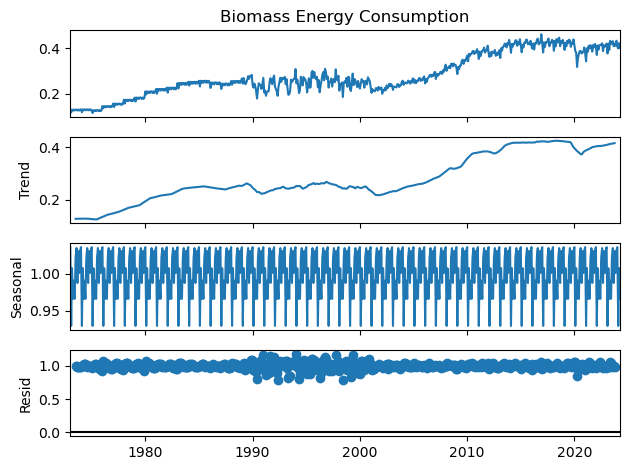

In [18]:
biomass = source_consumption_monthly[['Biomass Energy Consumption']].copy()
decompose_result = seasonal_decompose(biomass['Biomass Energy Consumption'],model='multiplicative')
decompose_result.plot();

Biomass Energy has level, trends, and seasonality. Because of these factors, we will be using Holt-Winter as opposed to methods like ARIMA.

In [19]:
# Set the frequency of the date time index as Monthly start as indicated by the data
biomass.index.freq = 'MS'
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)

<Axes: title={'center': 'Holt Winters Single Exponential Smoothing'}, xlabel='Date'>

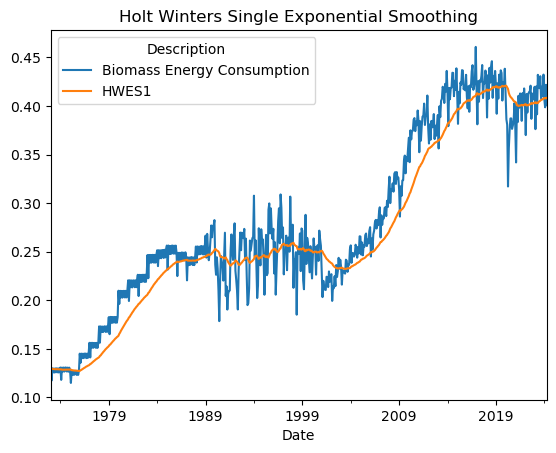

In [20]:
# Single HWES
biomass['HWES1'] = SimpleExpSmoothing(biomass['Biomass Energy Consumption']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
biomass[['Biomass Energy Consumption','HWES1']].plot(title='Holt Winters Single Exponential Smoothing')

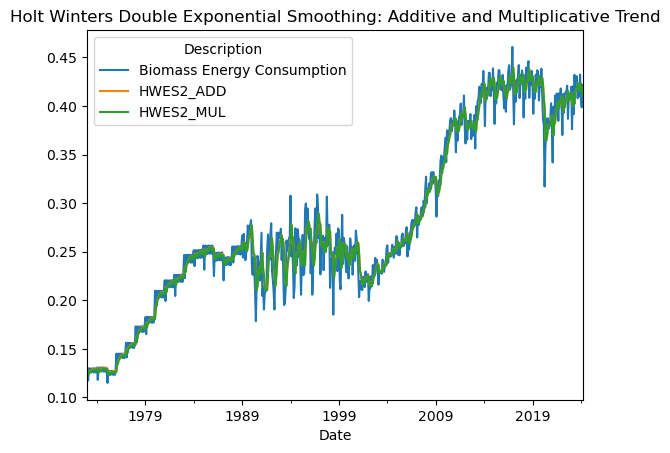

In [21]:
biomass['HWES2_ADD'] = ExponentialSmoothing(biomass['Biomass Energy Consumption'],trend='add').fit().fittedvalues
biomass['HWES2_MUL'] = ExponentialSmoothing(biomass['Biomass Energy Consumption'],trend='mul').fit().fittedvalues
biomass[['Biomass Energy Consumption','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend');

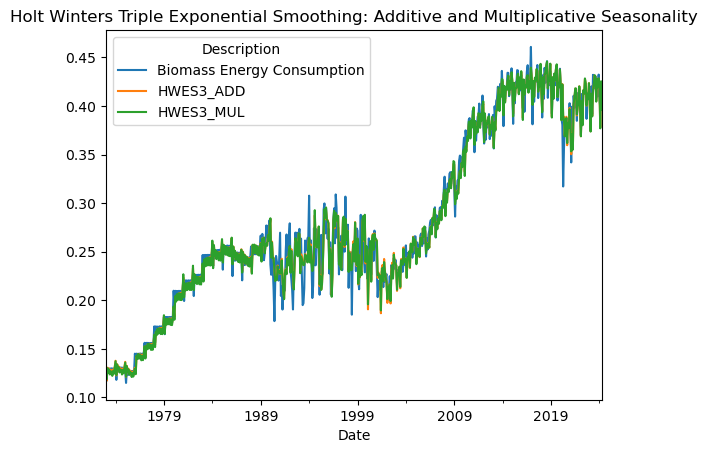

In [22]:
biomass['HWES3_ADD'] = ExponentialSmoothing(biomass['Biomass Energy Consumption'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
biomass['HWES3_MUL'] = ExponentialSmoothing(biomass['Biomass Energy Consumption'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
biomass[['Biomass Energy Consumption','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');

Triple Exponential Smoothing looks to be the best so let's use that. Let's run a test to see how the model compares to the last 3 years.

Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

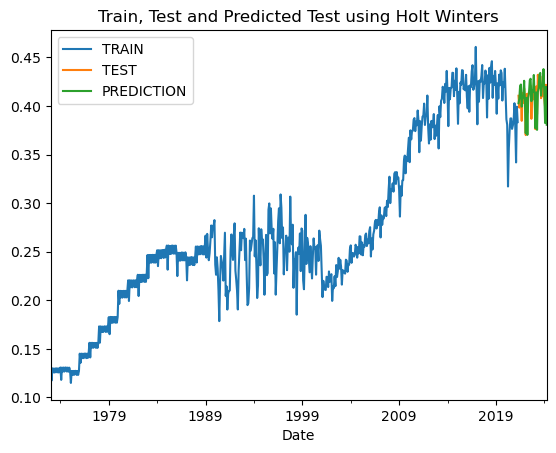

In [23]:
biomass_forcast = source_consumption_monthly[['Biomass Energy Consumption']]

biomass_forcast.index.freq = 'MS'

train = biomass_forcast[:-36]
test = biomass_forcast[-36:]

fitted_model = ExponentialSmoothing(train['Biomass Energy Consumption'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(36)

train['Biomass Energy Consumption'].plot(legend=True,label='TRAIN')
test['Biomass Energy Consumption'].plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

<Axes: xlabel='Date'>

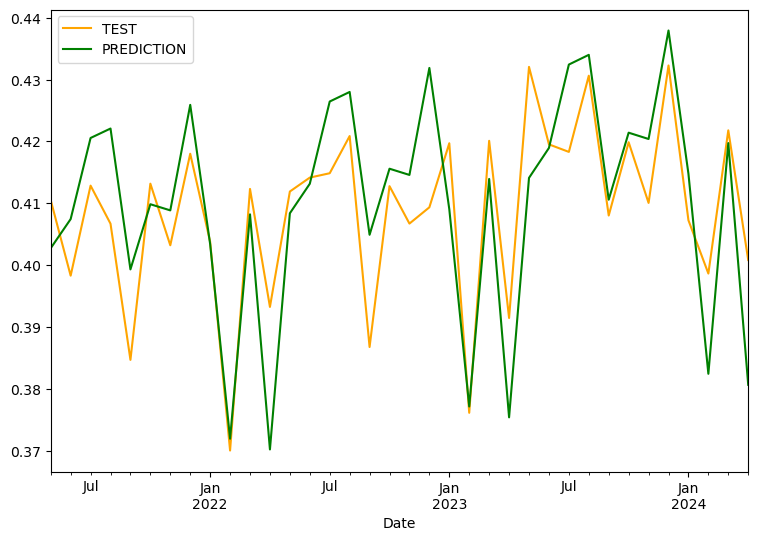

In [24]:
test['Biomass Energy Consumption'].plot(legend=True,label='TEST',figsize=(9,6),color='orange')
test_predictions.plot(legend=True,label='PREDICTION',color='green',xlim=['2021-05-01','2024-04-01'])

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_predictions)}')

Mean Absolute Error = 0.008650875407438648
Mean Squared Error = 0.00011767193951410905


This model is very accurate in predicting the last three years. Let's try to forcast the next decade.

<Axes: >

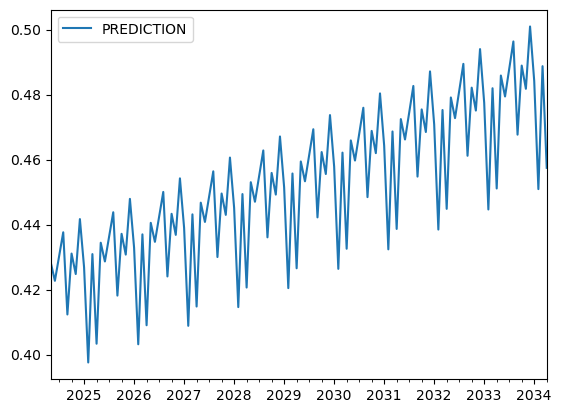

In [26]:
biomass_model = ExponentialSmoothing(biomass['Biomass Energy Consumption'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
biomass_model.forecast(120).plot(legend=True,label='PREDICTION')

In [27]:
forcast = pd.DataFrame(columns=source_consumption_monthly.columns)
for col_name in source_consumption_monthly.columns:
    forcast[col_name] = ExponentialSmoothing(source_consumption_monthly[col_name],trend='add',seasonal='add',seasonal_periods=12).fit().forecast(120)

In [28]:
px.line(forcast)

In [29]:
combined_df = pd.concat([source_consumption_monthly, forcast], axis=0).rename_axis('Date')
combined_df = combined_df[[
    'Coal Consumption',
    'Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)',
    'Petroleum Consumption (Excluding Biofuels)',
    'Nuclear Electric Power Consumption',
    'Biomass Energy Consumption',
    'Solar Energy Consumption',
    'Geothermal Energy Consumption',
    'Hydroelectric Power Consumption',
    'Wind Energy Consumption',
    'Total Fossil Fuels Consumption',
    'Total Primary Energy Consumption',
    'Total Renewable Energy Consumption']]

In [30]:
fig = px.line(combined_df, 
              color='Description',
              color_discrete_map={
                  'Coal Consumption':'gray',
                  'Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)':'red',
                  'Petroleum Consumption (Excluding Biofuels)':'sienna',
                  'Nuclear Electric Power Consumption':'lime',
                  'Biomass Energy Consumption':'green',
                  'Solar Energy Consumption':'yellow',
                  'Geothermal Energy Consumption':'orange',
                  'Hydroelectric Power Consumption':'blue',
                  'Wind Energy Consumption':'skyblue',
                  'Total Fossil Fuels Consumption':'saddlebrown',
                  'Total Primary Energy Consumption':'lightsteelblue',
                  'Total Renewable Energy Consumption':'seagreen'},
              title='Energy Consumption with Forecast in Quadrillion Btu', 
              hover_name='Description')

fig.add_vline(x=forcast.index[0])
fig.add_annotation(x=pd.to_datetime('2024-05-01'), text='extrapolated')

# quick date ranges
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=10, label="2024", step="year", stepmode="backward"),
            dict(count=25, label="2010", step="year", stepmode="backward"),
            dict(count=35, label="2000", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

# show/hide totals
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(
                    args=["visible", [True, True, True, True, True, True, True, True, True, True, True, True]],  # Show all traces
                    label="Show Totals",
                    method="restyle"
                ),
                dict(
                    args=["visible", [True, True, True, True, True, True, True, True, True, False, False, False]],  # Hide total lines
                    label="Hide Totals",
                    method="restyle"
                )
            ]),
            pad={"r": 10, "t": 10},
            showactive=True,
            x=1,
            xanchor="left",
            y=1.25,
            yanchor="top"
        )
    ]
)
fig.show()

Here is the predicted Energy Consumption per source in Quadrillion Btu for the next decade. It also includes category totals. For the most part, it keeps the general trends we noticed earlier, including a decreasing usage of coal, an significant increase in Natural Gas (but not petroleum), and minor increases in renewable energy sources.